In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File "drugs" to Load 
mouse_drug_data_path = os.path.join("data","mouse_drug_data.csv")
drugs = pd.read_csv(mouse_drug_data_path)
drugs.head(10)


,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn
5,o848,Stelasyn
6,z314,Stelasyn
7,g989,Stelasyn
8,m269,Stelasyn
9,a963,Stelasyn


In [2]:
print(type(drugs))

<class 'pandas.core.frame.DataFrame'>


In [3]:
# File "trials" to Load 

mouse_trial_path = os.path.join("data","clinicaltrial_data.csv")
trials= pd.read_csv(mouse_trial_path)
trials.head(10)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0
5,h246,0,45.0,0
6,p189,0,45.0,0
7,n923,0,45.0,0
8,q119,0,45.0,0
9,f993,0,45.0,0


In [4]:
print(type(trials))

<class 'pandas.core.frame.DataFrame'>


In [5]:
# Combine the data into a single dataset

maintable = pd.merge(drugs,trials)
maintable.head(10)


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


In [6]:
print(type(maintable))

<class 'pandas.core.frame.DataFrame'>


## Tumor Response to Treatment

In [7]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group_by_drugs = maintable.groupby(['Drug','Timepoint'])
group_drugs_mean = group_by_drugs.mean()
#print(type(group_drugs_mean))
group_drugs_mean

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174
          25                  39.939528          0.818182
          30                  38.769339          1.090909
          35                  37.816839          1.181818
          40                  36.958001          1.380952
          45                  36.236114          1.476190
Ceftamin  0                   45.000000          0.000000
          5                   46.503051          0.380952
          10                  48.285125          0.600000
          15                  50.094055          0.789474
          20                  52.157049          1.111111
          25                  54.287674          1.500000
          30                  56.769517          1.937500
          35                  58.827548          2.071429
          40                  61.467895          2.357143
          45                  64.132421          2.692308
Infubinol 0                   45.000000          0.000000
          5                   47.062001          0.280000
          10                  49.403909          0.666667
          15                  51.296397          0.904762
          20                  53.197691          1.050000
          25                  55.715252          1.277778
          30                  58.299397          1.588235
          35                  60.742461          1.666667
          40                  63.162824          2.100000
          45                  65.755562          2.111111
...                                 ...               ...
Ramicane  0                   45.000000          0.000000
          5                   43.944859          0.120000
          10                  42.531957          0.250000
          15                  41.495061          0.333333
          20                  40.238325          0.347826
          25                  38.974300          0.652174
          30                  38.703137          0.782609
          35                  37.451996          0.952381
          40                  36.574081          1.100000
          45                  34.955595          1.250000
Stelasyn  0                   45.000000          0.000000
          5                   47.527452          0.240000
          10                  49.463844          0.478261
          15                  51.529409          0.782609
          20                  54.067395          0.952381
          25                  56.166123          1.157895
          30                  59.826738          1.388889
          35                  62.440699          1.562500
          40                  65.356386          1.583333
          45                  68.438310          1.727273
Zoniferol 0                   45.000000          0.000000
          5                   46.851818          0.166667
          10                  48.689881          0.500000
          15                  50.779059          0.809524
          20                  53.170334          1.294118
          25                  55.432935          1.687500
          30                  57.713531          1.933333
          35                  60.089372          2.285714
          40                  62.916692          2.785714
          45                  65.960888          3.071429

[100 rows x 2 columns]

In [8]:
#group_by_drugs.groups
#dtype='int64' Dictionary

# Store the Standard Error of Tumor Volume Data Grouped by Drug and Timepoint 
#group_by_drugs = maintable.groupby(['Drug','Timepoint'])
group_drugs_std_error = group_by_drugs.sem()
#print(type(group_drugs_std_error))
group_drugs_std_error


Metastatic Sites  Mouse ID  Tumor Volume (mm3)
Drug      Timepoint                                                
Capomulin 0                  0.000000       NaN            0.000000
          5                  0.074833       NaN            0.448593
          10                 0.125433       NaN            0.702684
          15                 0.132048       NaN            0.838617
          20                 0.161621       NaN            0.909731
          25                 0.181818       NaN            0.881642
          30                 0.172944       NaN            0.934460
          35                 0.169496       NaN            1.052241
          40                 0.175610       NaN            1.223608
          45                 0.202591       NaN            1.223977
Ceftamin  0                  0.000000       NaN            0.000000
          5                  0.108588       NaN            0.164505
          10                 0.152177       NaN            0.236144
          15                 0.180625       NaN            0.332053
          20                 0.241034       NaN            0.359482
          25                 0.258831       NaN            0.439356
          30                 0.249479       NaN            0.490620
          35                 0.266526       NaN            0.692248
          40                 0.289128       NaN            0.708505
          45                 0.286101       NaN            0.902358
Infubinol 0                  0.000000       NaN            0.000000
          5                  0.091652       NaN            0.235102
          10                 0.159364       NaN            0.282346
          15                 0.194015       NaN            0.357705
          20                 0.234801       NaN            0.476210
          25                 0.265753       NaN            0.550315
          30                 0.227823       NaN            0.631061
          35                 0.224733       NaN            0.984155
          40                 0.314466       NaN            1.055220
          45                 0.309320       NaN            1.144427
...                               ...       ...                 ...
Ramicane  0                  0.000000       NaN            0.000000
          5                  0.066332       NaN            0.482955
          10                 0.090289       NaN            0.720225
          15                 0.115261       NaN            0.770432
          20                 0.119430       NaN            0.786199
          25                 0.119430       NaN            0.746991
          30                 0.139968       NaN            0.864906
          35                 0.145997       NaN            0.967433
          40                 0.160591       NaN            1.128445
          45                 0.190221       NaN            1.226805
Stelasyn  0                  0.000000       NaN            0.000000
          5                  0.087178       NaN            0.239862
          10                 0.123672       NaN            0.433678
          15                 0.153439       NaN            0.493261
          20                 0.200905       NaN            0.621889
          25                 0.219824       NaN            0.741922
          30                 0.230641       NaN            0.899548
          35                 0.240983       NaN            1.003186
          40                 0.312815       NaN            1.410435
          45                 0.359062       NaN            1.576556
Zoniferol 0                  0.000000       NaN            0.000000
          5                  0.077709       NaN            0.188950
          10                 0.109109       NaN            0.263949
          15                 0.111677       NaN            0.370544
          20                 0.166378       NaN            0.533182
          25                 0.236621       NaN            0.602513
         

In [9]:
# Minor Data Munging to Re-Format the Data Frames: mean
group_drugs_mean = group_drugs_mean.reset_index()
group_drugs_mean

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174
5,Capomulin,25,39.939528,0.818182
6,Capomulin,30,38.769339,1.090909
7,Capomulin,35,37.816839,1.181818
8,Capomulin,40,36.958001,1.380952
9,Capomulin,45,36.236114,1.476190


In [10]:
# Minor Data Munging to Re-Format the Data Frames: std_error
group_drugs_std_error = group_drugs_std_error.reset_index()
group_drugs_std_error

,Drug,Timepoint,Metastatic Sites,Mouse ID,Tumor Volume (mm3)
0,Capomulin,0,0.000000,NaN,0.000000
1,Capomulin,5,0.074833,NaN,0.448593
2,Capomulin,10,0.125433,NaN,0.702684
3,Capomulin,15,0.132048,NaN,0.838617
4,Capomulin,20,0.161621,NaN,0.909731
5,Capomulin,25,0.181818,NaN,0.881642
6,Capomulin,30,0.172944,NaN,0.934460
7,Capomulin,35,0.169496,NaN,1.052241
8,Capomulin,40,0.175610,NaN,1.223608
9,Capomulin,45,0.202591,NaN,1.223977


In [11]:
volume_pivot = group_drugs_mean.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
volume_pivot
#print(type(volume_pivot))

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [69]:
#sub group of 4 drugs
Capo = group_drugs_mean.loc[group_drugs_mean['Drug']=='Capomulin',:]
Infu = group_drugs_mean.loc[group_drugs_mean['Drug']=='Infubinol',:]
Keta = group_drugs_mean.loc[group_drugs_mean['Drug']=='Ketapril',:]
Place = group_drugs_mean.loc[group_drugs_mean['Drug']=='Placebo',:]



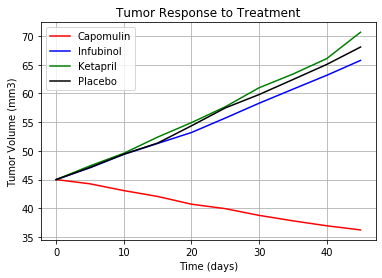

In [70]:
# Generate the Plot (with Error Bars)
Capomulin, = plt.plot(Capo["Timepoint"], Capo["Tumor Volume (mm3)"], color="red", label = "Capomulin")
Infubinol, = plt.plot(Infu["Timepoint"], Infu["Tumor Volume (mm3)"], color="blue", label = "Infubinol")
Ketapril, = plt.plot(Keta["Timepoint"], Keta["Tumor Volume (mm3)"], color="green", label = "Ketapril")
Placebo, = plt.plot(Place["Timepoint"], Place["Tumor Volume (mm3)"], color="black", label = "Placebo")

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (days)")
plt.grid(True)

# Create a legend for our chart
plt.legend(handles=[Capomulin, Infubinol, Ketapril, Placebo], labels=["Capomulin", "Infubinol", "Ketapril", "Placebo"], loc="best")

# Show the chart
plt.show()


In [71]:
# Save the figure
plt.savefig("TumorResponseTreatment.png")



<Figure size 432x288 with 0 Axes>

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [72]:
# Minor Data Munging to Re-Format the Data Frames
meta_pivot = group_drugs_mean.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
meta_pivot

#print(type(volume_pivot))
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


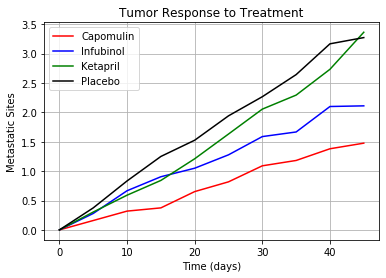

In [73]:
# Generate the Plot (with Error Bars)
Capomulin, = plt.plot(Capo["Timepoint"], Capo["Metastatic Sites"], color="red", label = "Capomulin")
Infubinol, = plt.plot(Infu["Timepoint"], Infu["Metastatic Sites"], color="blue", label = "Infubinol")
Ketapril, = plt.plot(Keta["Timepoint"], Keta["Metastatic Sites"], color="green", label = "Ketapril")
Placebo, = plt.plot(Place["Timepoint"], Place["Metastatic Sites"], color="black", label = "Placebo")

plt.title("Tumor Response to Treatment")
plt.ylabel("Metastatic Sites")
plt.xlabel("Time (days)")
plt.grid(True)

# Create a legend for our chart
plt.legend(handles=[Capomulin, Infubinol, Ketapril, Placebo], labels=["Capomulin", "Infubinol", "Ketapril", "Placebo"], loc="best")

# Show the chart
plt.show()
# Save the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)